### importing the Libraries for Data Preparation and analysis.

In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### importing the data.

In [580]:
train_data = pd.read_csv('/content/Assignment_Train.csv')

### showing top 5 Values.

In [581]:
train_data.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


### shape of the Data.

In [582]:
train_data.shape

(10000, 55)

### Columns of the Data.

In [583]:
train_data.columns

Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',
       

### info of the Data.

In [584]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   MIDDLE NAME                          2855 non-null   object 
 6   LAST NAME                            9319 non-null   object 
 7   mobile                               10000 non-null  int64  
 8   AADHAR VERIFIED                      10000 non-null  object 
 9   Cibil Score                          5703 non-null   object 
 10  MOBILE VERIFICATION                  10000 non-null  bool   
 11  DEALER NAME                  

### Columns to consider after applying Domain Knowledge.

In [585]:
cols_to_use = [
    'Cibil Score',
    'TOTAL ASSET COST',
    'APPLIED AMOUNT',
    'PRIMARY ASSET MAKE',
    'ADDRESS TYPE',
    'EMPLOY CONSTITUTION',
    'AGE',
    'Application Status'
]


In [624]:
train_data = train_data[cols_to_use]

### Checking cols: if they are having same Values.

In [587]:
# same = 0
# dif = 0
# for i in range(len(train_data['EMPLOY CONSTITUTION'])):
#   if train_data['EMPLOY CONSTITUTION'][i] == train_data['EMPLOYER TYPE'][i]:
#     same+=1
#   else:
#     dif+=1
# print(same,dif)


In [588]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cibil Score          5703 non-null   object 
 1   TOTAL ASSET COST     4892 non-null   float64
 2   APPLIED AMOUNT       10000 non-null  int64  
 3   PRIMARY ASSET MAKE   10000 non-null  object 
 4   ADDRESS TYPE         6688 non-null   object 
 5   EMPLOY CONSTITUTION  5002 non-null   object 
 6   AGE                  10000 non-null  int64  
 7   Application Status   10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


### Checking count of NULL Values.

In [589]:
train_data.isnull().sum()

,0
Cibil Score,4297
TOTAL ASSET COST,5108
APPLIED AMOUNT,0
PRIMARY ASSET MAKE,0
ADDRESS TYPE,3312
EMPLOY CONSTITUTION,4998
AGE,0
Application Status,0


### Conversion of Object Data to Numerice Data.

In [590]:
train_data['Cibil Score'] = pd.to_numeric(train_data['Cibil Score'], errors='coerce')

<Axes: xlabel='Cibil Score', ylabel='Density'>

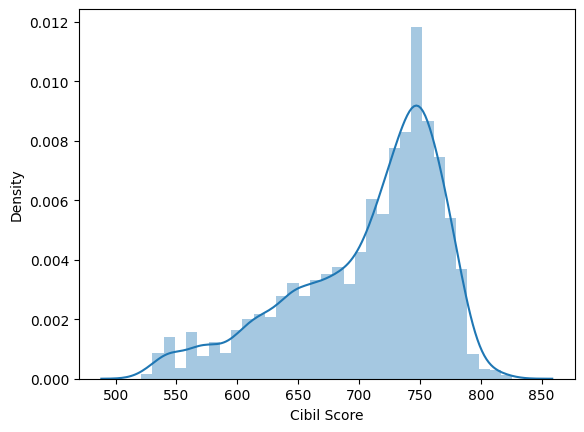

In [591]:
### filling missing Values.
## Cibil Score.
sns.distplot(train_data['Cibil Score'])

In [592]:
### Since Data is skewed.
median_value = train_data['Cibil Score'].median()
train_data['Cibil Score'].fillna(median_value, inplace=True)


<Axes: xlabel='TOTAL ASSET COST', ylabel='Density'>

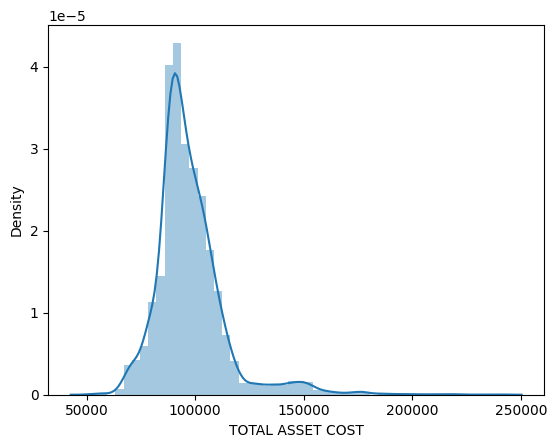

In [593]:
## TOTAL ASSET COST.
sns.distplot(train_data['TOTAL ASSET COST'])

In [594]:
### Since Data is skewed.
median_value = train_data['TOTAL ASSET COST'].median()
train_data['TOTAL ASSET COST'].fillna(median_value, inplace=True)

In [595]:
## Address Type.
train_data['ADDRESS TYPE'].value_counts()

,count
ADDRESS TYPE,
Self/Spouse Owned,2273
RESIDENCE,2176
Parental,1788
Rented,417
Company Provided,10
PARENT OWNED-HOUSE,9
OWNED-BUNGLOW,5
OWNED-PENTHOUSE,4
OWNDED-FLAT,3


In [596]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cibil Score          10000 non-null  float64
 1   TOTAL ASSET COST     10000 non-null  float64
 2   APPLIED AMOUNT       10000 non-null  int64  
 3   PRIMARY ASSET MAKE   10000 non-null  object 
 4   ADDRESS TYPE         6688 non-null   object 
 5   EMPLOY CONSTITUTION  5002 non-null   object 
 6   AGE                  10000 non-null  int64  
 7   Application Status   10000 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB


### since missing Data count is 4 so we filled with most Occuring.

In [597]:
train_data['ADDRESS TYPE'].fillna('Self/Spouse Owned',inplace=True)

In [598]:
train_data['EMPLOY CONSTITUTION'].value_counts()

,count
EMPLOY CONSTITUTION,
SELF-EMPLOYED,3472
SALARIED,1530


### Here we filled randomly on the basis of Precentage.

In [599]:
### filling values.
total = train_data['EMPLOY CONSTITUTION'].notna().sum()
self_e = train_data['EMPLOY CONSTITUTION'].value_counts()[0]/total
sal = train_data['EMPLOY CONSTITUTION'].value_counts()[1]/total


np.random.seed(0)
fill_values = np.random.choice(['SELF-EMPLOYED', 'SALARIED'], size=len(train_data[train_data['EMPLOY CONSTITUTION'].isna()]), p=[self_e, sal])
train_data.loc[train_data['EMPLOY CONSTITUTION'].isna(), 'EMPLOY CONSTITUTION'] = fill_values

In [600]:
train_data.isnull().sum()

,0
Cibil Score,0
TOTAL ASSET COST,0
APPLIED AMOUNT,0
PRIMARY ASSET MAKE,0
ADDRESS TYPE,0
EMPLOY CONSTITUTION,0
AGE,0
Application Status,0


In [601]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cibil Score          10000 non-null  float64
 1   TOTAL ASSET COST     10000 non-null  float64
 2   APPLIED AMOUNT       10000 non-null  int64  
 3   PRIMARY ASSET MAKE   10000 non-null  object 
 4   ADDRESS TYPE         10000 non-null  object 
 5   EMPLOY CONSTITUTION  10000 non-null  object 
 6   AGE                  10000 non-null  int64  
 7   Application Status   10000 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB


In [602]:
train_data['PRIMARY ASSET MAKE'].value_counts()

,count
PRIMARY ASSET MAKE,
HERO MOTORS,3618
HONDA MOTORS,3259
TVS MOTOR CO,1416
BAJAJ AUTO INDIA,747
SUZUKI MOTORCYCLE,485
YAMAHA MOTOR,224
AMO ELECTRIC,68
OKAYA ELECTRIC,49
OKINAWA ELECTRIC,26


In [603]:
train_data['ADDRESS TYPE'].value_counts()

,count
ADDRESS TYPE,
Self/Spouse Owned,5585
RESIDENCE,2176
Parental,1788
Rented,417
Company Provided,10
PARENT OWNED-HOUSE,9
OWNED-BUNGLOW,5
OWNED-PENTHOUSE,4
OWNDED-FLAT,3


In [604]:
train_data['EMPLOY CONSTITUTION'].value_counts()

,count
EMPLOY CONSTITUTION,
SELF-EMPLOYED,6950
SALARIED,3050


### Here we are doing Dimensionality reduction.

In [605]:
values_to_replace = [
    'PARENT OWNED-HOUSE', 'OWNED-BUNGLOW', 'OWNED-FLAT',
    'OWNED-ROWHOUSE', 'PARENT OWNED-FLAT', 'RENTED-ROWHOUSE'
]
value_to_replace_in_other = ['ATHER ELECTRIC']
train_data.loc[train_data['ADDRESS TYPE'].isin(values_to_replace), 'ADDRESS TYPE'] = 'OTHERS'
train_data.loc[train_data['ADDRESS TYPE'].isin(value_to_replace_in_other), 'ADDRESS TYPE'] = 'HERO MOTORS'

### splitting into Dependent and Independent columns.

In [606]:
X = train_data.drop('Application Status', axis=1)
y = train_data['Application Status']

In [607]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cibil Score          10000 non-null  float64
 1   TOTAL ASSET COST     10000 non-null  float64
 2   APPLIED AMOUNT       10000 non-null  int64  
 3   PRIMARY ASSET MAKE   10000 non-null  object 
 4   ADDRESS TYPE         10000 non-null  object 
 5   EMPLOY CONSTITUTION  10000 non-null  object 
 6   AGE                  10000 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [608]:
X.shape

(10000, 7)

### Applying Label Encoder on Dependent Variable.

In [609]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

### Column Transformer with One Hot Encoding.

In [610]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), [3,4,5])], remainder='passthrough')

### Train Test Split.

In [611]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Fit and Transform with ColumnTransformer.

In [615]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

### Applying Models.

In [616]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [617]:
models = {
    'random_forest':RandomForestClassifier(),
    'Decision_tree':DecisionTreeClassifier(),
    'Logistic':LogisticRegression(),
}

In [618]:
for model_name,model in models.items():
    # Training Model.
    model.fit(X_train, y_train)
    ## Predicting Model.
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    ## Scores of Training.
    model_train_accuracy = accuracy_score(y_pred_train,y_train)
    model_train_precision = precision_score(y_pred_train,y_train,average='macro')
    model_train_f1_score = f1_score(y_pred_train,y_train,average='weighted')
    model_train_recall = recall_score(y_pred_train,y_train,average='weighted')

    ## scores of Testing.
    model_test_accuracy = accuracy_score(y_pred_test,y_test)
    model_test_precision = precision_score(y_pred_test,y_test,average='macro')
    model_test_f1_score = f1_score(y_pred_test,y_test,average='weighted')
    model_test_recall = recall_score(y_pred_test,y_test,average='weighted')




    print(model_name)

    print("Model Performance for Training Set")
    print("- Accuracy Score :{:.4f}".format(model_train_accuracy))
    print("- F1 Score :{:.4f}".format(model_train_f1_score))
    print("- Precision Score :{:.4f}".format(model_train_precision))
    print("- Recall Score :{:.4f}".format(model_train_recall))

    print('----------------------------------')
    print("Model Performance for Testing Set")
    print("- Accuracy Score :{:.4f}".format(model_test_accuracy))
    print("- F1 Score :{:.4f}".format(model_test_f1_score))
    print("- Precision Score :{:.4f}".format(model_test_precision))
    print("- Recall Score :{:.4f}".format(model_test_recall))

    print('='*35)
    print('\n')

random_forest
Model Performance for Training Set
- Accuracy Score :0.9935
- F1 Score :0.9935
- Precision Score :0.9920
- Recall Score :0.9935
----------------------------------
Model Performance for Testing Set
- Accuracy Score :0.8780
- F1 Score :0.8794
- Precision Score :0.8544
- Recall Score :0.8780


Decision_tree
Model Performance for Training Set
- Accuracy Score :0.9935
- F1 Score :0.9935
- Precision Score :0.9907
- Recall Score :0.9935
----------------------------------
Model Performance for Testing Set
- Accuracy Score :0.8475
- F1 Score :0.8481
- Precision Score :0.8270
- Recall Score :0.8475


Logistic
Model Performance for Training Set
- Accuracy Score :0.6624
- F1 Score :0.7631
- Precision Score :0.5073
- Recall Score :0.6624
----------------------------------
Model Performance for Testing Set
- Accuracy Score :0.6485
- F1 Score :0.7614
- Precision Score :0.5008
- Recall Score :0.6485




In [619]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

### Transporting Model Via Pickle File.

In [620]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(ct,open('ct.pkl','wb'))